# NSF
figures for the grant proposal

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table
from scipy.optimize import curve_fit

from scipy.stats import binned_statistic_2d

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

ftype = '.pdf'

In [2]:
Gfile = '../data/kepler_dr2_1arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')
gaia = data.to_pandas()
print(gaia.shape)

rot_file = '../data/Table_Periodic.txt'
rot = pd.read_csv(rot_file)
df = pd.merge(rot, gaia, right_on='kepid', left_on='KID')
print(df.shape)

ok = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              (df[u'r_modality_flag'] == 1) & 
              (df[u'r_result_flag'] == 1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01))[0]
print(ok.shape)

(195830, 101)
(33538, 112)
(30305,)


We can re-make the key figure very simply after applying sensible selection cuts (`ok = ` above)

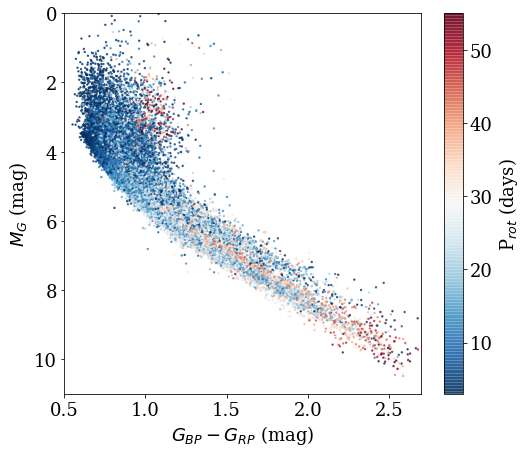

In [38]:
# cm = plt.cm.get_cmap('Spectral_r')
cm = plt.cm.RdBu_r


fig, ax1 = plt.subplots(figsize=(8,7))

plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok])  + 5, 
            c=(df[u'Prot'].values[ok]), alpha=0.7, s=2, cmap=cm)

plt.clim(3, 55)
plt.ylim(11,0)
plt.xlim(.5,2.7)
plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

cb = plt.colorbar()
cb.set_label('P$_{rot}$ (days)')
plt.savefig('../figures/NSF_cmd1'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)

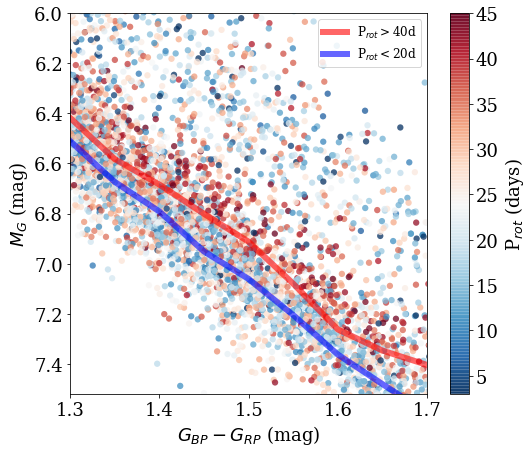

In [45]:
cm = plt.cm.RdBu_r

plt.figure(figsize=(8,7))


plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] - 5. * np.log10(df[u'r_est'].values[ok]) + 5, 
            c=(df[u'Prot'].values[ok]), 
            alpha=0.75, s=40, cmap=cm, edgecolors='k', lw=0)

plt.clim(3, 45)

plt.ylim(7.52, 6)
plt.xlim(1.3, 1.7)

plt.xlabel('$G_{BP} - G_{RP}$ (mag)')
plt.ylabel('$M_G$ (mag)')

cb = plt.colorbar()
cb.set_label('P$_{rot}$ (days)')

# put 2 lines down: the running medians of stars w/ Prot =[0,10], and medians of stars w/ Prot=[20,50]

mg1 = np.zeros(9, dtype=np.float)
mg2 = np.zeros(9, dtype=np.float)
for k in range(9):
    cb1 = np.where((df[u'bp_rp'].values[ok] >= 1.3+k*0.05) & 
                   (df[u'bp_rp'].values[ok] < 1.3+(k+1)*0.05) & 
                   (df[u'Prot'].values[ok] > 0) & 
                   (df[u'Prot'].values[ok] < 20))[0]
    
    cb2 = np.where((df[u'bp_rp'].values[ok] >= 1.3+k*0.05) & 
                   (df[u'bp_rp'].values[ok] < 1.3+(k+1)*0.05) & 
                   (df[u'Prot'].values[ok] > 40) & 
                   (df[u'Prot'].values[ok] < 75))[0]
    mg1[k] = np.nanmedian(df[u'phot_g_mean_mag'].values[ok][cb1] - 5. * np.log10(df[u'r_est'].values[ok][cb1]) + 5)
    mg2[k] = np.nanmedian(df[u'phot_g_mean_mag'].values[ok][cb2] - 5. * np.log10(df[u'r_est'].values[ok][cb2]) + 5)

plt.plot(np.arange(1.3, 1.75, 0.05), mg2, c='r', lw=6, alpha=0.6, label='P$_{rot} >$40d')
plt.plot(np.arange(1.3, 1.75, 0.05), mg1, c='b', lw=6, alpha=0.6, label='P$_{rot} <$20d')

plt.legend(loc='upper right', fontsize=12)

plt.savefig('../figures/NSF_cmd2'+ftype, dpi=300, bbox_inches='tight', pad_inches=0.25)